# TASK 2- UNEMPLOYMENT ANALYSIS WITH PYTHON (UNEMPLOYMENT IN INDIA)

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading the data

In [2]:
data = pd.read_csv('Unemployment.csv')
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


# Datatype

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


# Finding null values

In [4]:
data.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

# Data Preprocessing

In [5]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [6]:
data1=data.dropna()

In [7]:
data1.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [8]:
data1.drop(columns=[" Date"],inplace=True)

In [9]:
data1

,Region,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...
749,West Bengal,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,Monthly,15.22,9240903.0,40.67,Urban


In [10]:
data1["Region"] = enc.fit_transform(data1["Region"])
data1[" Frequency"] = enc.fit_transform(data1[" Frequency"])
data1["Area"] = enc.fit_transform(data1["Area"])

In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    int32  
 1    Frequency                                740 non-null    int32  
 2    Estimated Unemployment Rate (%)          740 non-null    float64
 3    Estimated Employed                       740 non-null    float64
 4    Estimated Labour Participation Rate (%)  740 non-null    float64
 5   Area                                      740 non-null    int32  
dtypes: float64(3), int32(3)
memory usage: 31.8 KB


# Describing the data

In [12]:
data1.describe()

,Region,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
count,740.000000,740.000000,740.000000,7.400000e+02,740.000000,740.000000
mean,13.690541,0.514865,11.787946,7.204460e+06,42.630122,0.514865
std,8.052612,0.500117,10.721298,8.087988e+06,8.111094,0.500117
min,0.000000,0.000000,0.000000,4.942000e+04,13.330000,0.000000
25%,7.000000,0.000000,4.657500,1.190404e+06,38.062500,0.000000
50%,14.000000,1.000000,8.350000,4.744178e+06,41.160000,1.000000
75%,20.000000,1.000000,15.887500,1.127549e+07,45.505000,1.000000
max,27.000000,1.000000,76.740000,4.577751e+07,72.570000,1.000000


# Shape

In [13]:
data1.shape

(740, 6)

# Correlation

In [14]:
data1.corr()

,Region,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
Region,1.000000,-0.013472,-0.056726,0.210371,0.169119,-0.013472
Frequency,-0.013472,1.000000,0.132563,-0.358902,-0.219717,1.000000
Estimated Unemployment Rate (%),-0.056726,0.132563,1.000000,-0.222876,0.002558,0.132563
Estimated Employed,0.210371,-0.358902,-0.222876,1.000000,0.011300,-0.358902
Estimated Labour Participation Rate (%),0.169119,-0.219717,0.002558,0.011300,1.000000,-0.219717
Area,-0.013472,1.000000,0.132563,-0.358902,-0.219717,1.000000


# Data Visualization

# Distribution plot

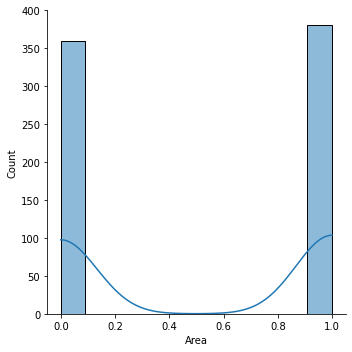

In [15]:
sns.displot(data1["Area"],kde=True)

# Heat Map

<AxesSubplot:>

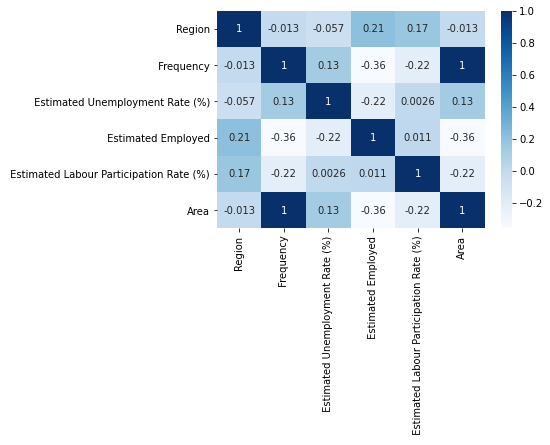

In [16]:
sns.heatmap(data1.corr(),annot=True,cmap='Blues')


# Data Modeling

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = data1.drop(columns=[" Estimated Unemployment Rate (%)"])
Y = data1[" Estimated Unemployment Rate (%)"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=20)

In [19]:
print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

x_train.shape: (518, 5)
x_test.shape: (222, 5)
y_train.shape: (518,)
y_test.shape: (222,)


# Model Building

# Loading the models

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [21]:
models=[LinearRegression(), SVR(), RandomForestRegressor(), DecisionTreeRegressor()]
def compare_models_train_test():
    for model in models:
        model.fit(x_train,y_train)
        test_data_prediction=model.predict(x_test) 
        r2s=r2_score(y_test, test_data_prediction)*100 
        print('r2_score of the',model,'=',r2s)
compare_models_train_test()

r2_score of the LinearRegression() = 2.2559123819314686
r2_score of the SVR() = 9.867144943247041
r2_score of the RandomForestRegressor() = 65.49095795617563
r2_score of the DecisionTreeRegressor() = 47.96881517460416


# Among all the algorithms, I found that RandomForest Algorithm has highest accuracy.